In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
raw_data= pd.read_csv('Data/train.csv')

In [3]:
search_level=[
    'srch_id',                                                                # we need it for our Explonatory analysis. 
    #'srch_date_time',                                                        # It doesn't help our prediction
    #'srch_visitor_id',                                                       # It doesn't help our prediction
    'srch_visitor_visit_nbr', 
    #'srch_visitor_loc_country',
    #'srch_visitor_loc_region',
    #'srch_visitor_loc_city',                                                 
    #'srch_visitor_wr_member',                                                # This feature could help but it has a lot of Null value 
    #'srch_posa_continent', 
    #'srch_posa_country',
    #'srch_hcom_destination_id', 
    #'srch_dest_longitude', 
    #'srch_dest_latitude',
    #'srch_ci', 'srch_co',
    #'srch_ci_day',
    #'srch_co_day', 
    #'srch_los',
    #'srch_bw',
    #'srch_adults_cnt',
    #'srch_children_cnt',
    #'srch_rm_cnt',
    #'srch_mobile_bool',
    #'srch_mobile_app',
    #'srch_device', 
    #'srch_currency' 
    #'srch_local_date'
]

In [4]:
property_level=[
    'prop_key',                                                       # we need it for our Explonatory analysis.                                  
    'prop_travelad_bool',
    'prop_dotd_bool',
    #'prop_price_without_discount_local',                            # we have the USD one                        
    'prop_price_without_discount_usd',                               # we need both w/o discount for extracting features. 
    #'prop_price_with_discount_local', 
    'prop_price_with_discount_usd',
    'prop_imp_drr',
    'prop_brand_bool',
    'prop_starrating',
    #'prop_super_region', 
    #'prop_continent',
    # 'prop_country', 
    'prop_market_id', 
    'prop_submarket_id',
    'prop_room_capacity',
    'prop_review_score', 
    'prop_review_count',
    #'prop_hostel_bool',                                           # Vey Unbalanced object
    ]

In [5]:
#find the dataypes of features
target=["prop_booking_bool"]
refined_data=raw_data.loc[:,search_level+property_level +target]
refined_data

,srch_id,srch_visitor_visit_nbr,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_booking_bool
0,-1046322713,5,257690,0,0,186.72,111.80,0,1,3.5,60041,109140,575,4.1,403.0,0
1,-1046322713,5,3066218,0,0,153.71,92.24,1,0,3.0,60041,109140,339,3.6,101.0,0
2,-1046322713,5,2271987,0,0,467.25,93.98,0,1,3.5,60041,109140,179,4.1,1189.0,0
3,-1046322713,5,3308025,0,0,476.65,173.30,0,1,5.0,60041,98278,272,4.8,221.0,0
4,-1046322713,5,3222046,0,0,181.39,86.25,0,0,3.0,60041,109140,198,3.9,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,5,249748,0,0,334.00,284.00,1,1,4.0,95656,85868,251,4.1,1928.0,0
841111,964783409,5,255778,0,0,649.00,269.00,0,1,4.0,95656,96809,712,4.2,605.0,0
841112,964783409,5,244678,0,0,285.00,225.00,0,0,3.0,95656,96809,369,4.0,5305.0,0
841113,964783409,5,259221,0,0,559.00,314.00,0,1,4.0,95656,96812,770,4.2,1809.0,0


In [6]:
# average price of the property

#Data['Mean_Price_Prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('mean')
#Data['SD_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('std')
#Data['Median_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('median')
#Data['Diff_Price_Prop_mean'] = Data['prop_price_with_discount_usd']-Data['Mean_Price_Prop']
#Data["prop_discount_history_rate"] = Data.groupby(['prop_key'], as_index= False)['discountrate'].transform('mean')



#Data["prop_Price_rank"] = Data.groupby("srch_id")["prop_price_with_discount_usd"].rank("dense", ascending=False)
#Data["prop_meanPrice_rank"] = Data.groupby("srch_id")["Mean_Price_Prop"].rank("dense", ascending=False)
 



In [7]:
refined_data.isnull().sum(axis = 0)

srch_id                             0
srch_visitor_visit_nbr              0
prop_key                            0
prop_travelad_bool                  0
prop_dotd_bool                      0
prop_price_without_discount_usd    51
prop_price_with_discount_usd       51
prop_imp_drr                        0
prop_brand_bool                     0
prop_starrating                     0
prop_market_id                      0
prop_submarket_id                   0
prop_room_capacity                  0
prop_review_score                   8
prop_review_count                   8
prop_booking_bool                   0
dtype: int64

In [8]:
refined_data.dropna(inplace=True)

In [53]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)




def feature_extraction(Data):
     
    # Extracting Serach rank
    Data['search_rank'] = Data.groupby(['srch_id']).cumcount()+1
    
    #Extracting Price Ratio
    Data['max_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(max)
    Data['price_ratio']=Data.prop_price_with_discount_usd/Data.max_price
    Data.drop("max_price",axis=1,inplace=True)
    
    #Extracting minimum price or not
    Data['min_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(min)
    Data.loc[Data['prop_price_with_discount_usd'] == Data['min_price'] , 'minornot'] = 1
    Data.loc[Data['prop_price_with_discount_usd'] != Data['min_price'] , 'minornot'] = 0
    Data.drop("min_price",axis=1,inplace=True)

    # Extracting Market Rate
    Data['market_Rate'] = Data.groupby(['prop_market_id', 'prop_submarket_id'], as_index= False)['prop_booking_bool'].transform('mean')
    Market_rate =  Data[['prop_market_id', 'prop_submarket_id','market_Rate']].drop_duplicates()


    
    
    
    # Extracting discount rate for the property
    Data['discountrate'] = (Data.prop_price_without_discount_usd-Data.prop_price_with_discount_usd)/Data.prop_price_without_discount_usd
    Data.drop('prop_price_without_discount_usd',axis=1,inplace=True)
    
    # Extracting booking rate of the property
    Data['Booking_rate'] = Data.groupby(['prop_key'])['prop_booking_bool'].transform('mean')
    Booking_rate =  Data[['prop_key','Booking_rate']].drop_duplicates()
    
    # Extracting property star rating rank
    Data["prop_starrating_rank"] = Data.groupby("srch_id")["prop_starrating"].rank("dense", ascending=False)
    

    # Extracting room capacity rank
    Data["prop_room_capacity_rank"] = Data.groupby("srch_id")["prop_room_capacity"].rank("dense", ascending=False)
    Data.drop('prop_room_capacity',axis=1,inplace=True)
    
    # Extracting prop review score rank
    Data["prop_review_score_rank"] = Data.groupby("srch_id")["prop_review_score"].rank("dense", ascending=False)
    Data.drop('prop_review_score',axis=1,inplace=True)
    
    # Extracting prop review count rank
    Data["prop_review_count_rank"] = Data.groupby("srch_id")["prop_review_count"].rank("dense", ascending=False)
    Data.drop('prop_review_count',axis=1,inplace=True)
   

    #new features for Prperty Key
    Data['Mean_Price_Prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('mean')
    Data['SD_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('std')
    Data['Median_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('median')
    Data['Diff_Price_Prop_mean'] = Data['prop_price_with_discount_usd']-Data['Mean_Price_Prop']
    Data["prop_discount_history_rate"] = Data.groupby(['prop_key'], as_index= False)['discountrate'].transform('mean')
    Data["prop_appear_history"] = Data.groupby(['prop_key'], as_index= False)['srch_id'].transform('count')


    Data["prop_Price_rank"] = Data.groupby("srch_id")["prop_price_with_discount_usd"].rank("dense", ascending=False)
    Data["prop_meanPrice_rank"] = Data.groupby("srch_id")["Mean_Price_Prop"].rank("dense", ascending=False)

    Data['Submarket_Starrating_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['prop_starrating'].transform('mean')
    Data['Diff_PropSTR_SubmarketSTR']=Data['prop_starrating']- Data['Submarket_Starrating_mean']
    
    Data['starrating_floor']=Data['prop_starrating'].apply(np.floor)
    
    Data['Rank_by_StarRating_&_price']=Data.sort_values(by=['starrating_floor', 'price_ratio'], ascending=[False, True]).groupby(['srch_id'], as_index= False, sort=False).cumcount()+1
    Data['Rank_by_StarRating_&_Bookingrate']=Data.sort_values(by=['starrating_floor', 'Booking_rate'], ascending=[False, False]).groupby(['srch_id'], as_index= False, sort=False).cumcount()+1

    
    Data['Submarket_price_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['prop_price_with_discount_usd'].transform('mean')
    Data['Diff_PropPrice_SubmarketPrice']=Data['Submarket_price_mean']-Data['prop_price_with_discount_usd']
    
    Data['Submarket_Br_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['Booking_rate'].transform('mean')
    Data['Diff_PropSTR_SubmarketSTR_BR']=Data['Submarket_Br_mean']-Data['Booking_rate']
    
    
    
    #Data['Submarket_price_mean_B1']= Data.groupby(['prop_submarket_id'], as_index= False)[Data.prop_booking_bool==1]['prop_price_with_discount_usd'].mean('mean')
   # Data['Diff_PropPrice_SubmarketPrice_B1']=Data['Submarket_price_mean_B1']-Data['prop_price_with_discount_usd']
    
    #Data['Submarket_Br_mean_B1']= Data.groupby(['prop_submarket_id'], as_index= False)[Data.prop_booking_bool==1]['Booking_rate'].transform('mean')
    #Data['Diff_PropSTR_SubmarketSTR_BR_B1']=Data['Submarket_Br_mean_B1']-Data['Booking_rate']
    

    
    #Data['Mean_lat']= Data.groupby("srch_id", as_index= False)['srch_dest_latitude'].transform('mean')
    #Data['Mean_long']= Data.groupby("srch_id", as_index= False)['srch_dest_longitude'].transform('mean')
    
    #Data = Data.assign(mean_distance=lambda x: haversine_distance(x['srch_dest_latitude'], x['srch_dest_longitude'], x['Mean_lat'], x['Mean_long'])) 
    
    #Data['mean_distance'] = Data[['srch_dest_latitude','srch_dest_longitude','Mean_lat','Mean_long']].apply(lambda x = )
    
    
    
    #Data.drop('srch_dest_latitude',axis=1,inplace=True)
    #Data.drop('srch_dest_longitude',axis=1,inplace=True)
    #Data.drop('Mean_long',axis=1,inplace=True)
    #Data.drop('Mean_lat',axis=1,inplace=True)
    
    Data.drop('Submarket_Starrating_mean',axis=1,inplace=True)
    Data.drop('prop_starrating',axis=1,inplace=True)
    Data.drop('prop_market_id',axis=1,inplace=True)
    Data.drop('prop_submarket_id',axis=1,inplace=True)
    
    #Data.drop('srch_id',axis=1,inplace=True)
    #Data.drop('prop_key',axis=1,inplace=True)
    
    return Data, Market_rate, Booking_rate
    

In [54]:

mydata, Market_rate, Booking_rate = feature_extraction(refined_data.copy())
mydata

,srch_id,srch_visitor_visit_nbr,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_booking_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank,Mean_Price_Prop,SD_Price_prop,Median_Price_prop,Diff_Price_Prop_mean,prop_discount_history_rate,prop_appear_history,prop_Price_rank,prop_meanPrice_rank,Diff_PropSTR_SubmarketSTR,starrating_floor,Rank_by_StarRating_&_price,Rank_by_StarRating_&_Bookingrate,Submarket_price_mean,Diff_PropPrice_SubmarketPrice,Submarket_Br_mean,Diff_PropSTR_SubmarketSTR_BR
0,-1046322713,5,257690,0,0,111.80,0,1,0,1,0.433754,0.0,0.043650,0.401243,0.019868,4.0,7.0,8.0,17.0,462.266556,2127.526558,170.73,-350.466556,0.116838,151,16.0,23.0,0.380146,3.0,39,38,610.749537,498.949537,0.043650,0.023783
1,-1046322713,5,3066218,0,0,92.24,1,0,0,2,0.357866,0.0,0.043650,0.399909,0.084932,5.0,12.0,12.0,38.0,689.974767,7256.774062,97.82,-597.734767,0.379608,365,27.0,14.0,-0.119854,3.0,28,15,610.749537,518.509537,0.043650,-0.041281
2,-1046322713,5,2271987,0,0,93.98,0,1,0,3,0.364617,0.0,0.043650,0.798866,0.049383,4.0,29.0,8.0,2.0,764.414136,10334.476429,120.02,-670.434136,0.549161,324,26.0,12.0,0.380146,3.0,29,28,610.749537,516.769537,0.043650,-0.005732
3,-1046322713,5,3308025,0,0,173.30,0,1,0,4,0.672357,0.0,0.034334,0.636421,0.060606,1.0,18.0,1.0,27.0,913.456014,9279.635790,283.01,-740.156014,0.379456,429,5.0,8.0,1.443147,5.0,1,1,541.765860,368.465860,0.034334,-0.026272
4,-1046322713,5,3222046,0,0,86.25,0,0,0,5,0.334627,0.0,0.043650,0.524505,0.072435,5.0,26.0,10.0,6.0,585.322978,7129.642143,86.44,-499.072978,0.342912,497,29.0,17.0,-0.119854,3.0,27,18,610.749537,524.499537,0.043650,-0.028784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,5,249748,0,0,284.00,1,1,0,49,0.291282,0.0,0.024787,0.149701,0.032999,3.0,34.0,7.0,18.0,329.788221,130.123437,319.00,-45.788221,0.218961,1394,27.0,39.0,0.607190,4.0,9,14,282.523118,-1.476882,0.024787,-0.008211
841111,964783409,5,255778,0,0,269.00,0,1,0,50,0.275897,0.0,0.033202,0.585516,0.038763,3.0,16.0,6.0,42.0,584.512838,8563.548563,305.00,-315.512838,0.232183,2167,29.0,4.0,0.115180,4.0,7,11,400.365371,131.365371,0.033202,-0.005562
841112,964783409,5,244678,0,0,225.00,0,0,0,51,0.230769,0.0,0.033202,0.210526,0.040398,5.0,25.0,8.0,5.0,213.876823,120.751599,185.00,11.123177,0.325789,1807,37.0,52.0,-0.884820,3.0,38,40,400.365371,175.365371,0.033202,-0.007197
841113,964783409,5,259221,0,0,314.00,0,1,0,52,0.322051,0.0,0.026574,0.438283,0.009461,3.0,13.0,6.0,22.0,400.070590,194.258329,392.00,-86.070590,0.310247,1374,23.0,22.0,0.173332,4.0,13,33,397.149000,83.149000,0.026574,0.017113


In [55]:
mydata.to_csv('Data/mydata.csv')

In [11]:
mydata.isnull().sum(axis = 0)

srch_visitor_visit_nbr                0
prop_travelad_bool                    0
prop_dotd_bool                        0
prop_price_with_discount_usd          0
prop_imp_drr                          0
prop_brand_bool                       0
prop_booking_bool                     0
search_rank                           0
price_ratio                           0
minornot                              0
market_Rate                           0
discountrate                          2
Booking_rate                          0
prop_starrating_rank                  0
prop_room_capacity_rank               0
prop_review_score_rank                0
prop_review_count_rank                0
Mean_Price_Prop                       0
SD_Price_prop                       994
Median_Price_prop                     0
Diff_Price_Prop_mean                  0
prop_discount_history_rate            0
prop_appear_history                   0
prop_Price_rank                       0
prop_meanPrice_rank                   0


In [12]:
mydata=mydata.fillna(0)

In [13]:
#pd.set_option('display.max_columns', None)

#mydata[mydata.SD_Price_prop.isnull()].sort_values('prop_key')

In [14]:
pd.set_option('display.max_columns', None)
#mydata.loc[mydata.srch_id==-1046322713].sort_values('Rank_by_StarRating_&_price')

In [15]:
mydata.dropna(inplace=True)
mydata.drop_duplicates(inplace=True)

<AxesSubplot:>

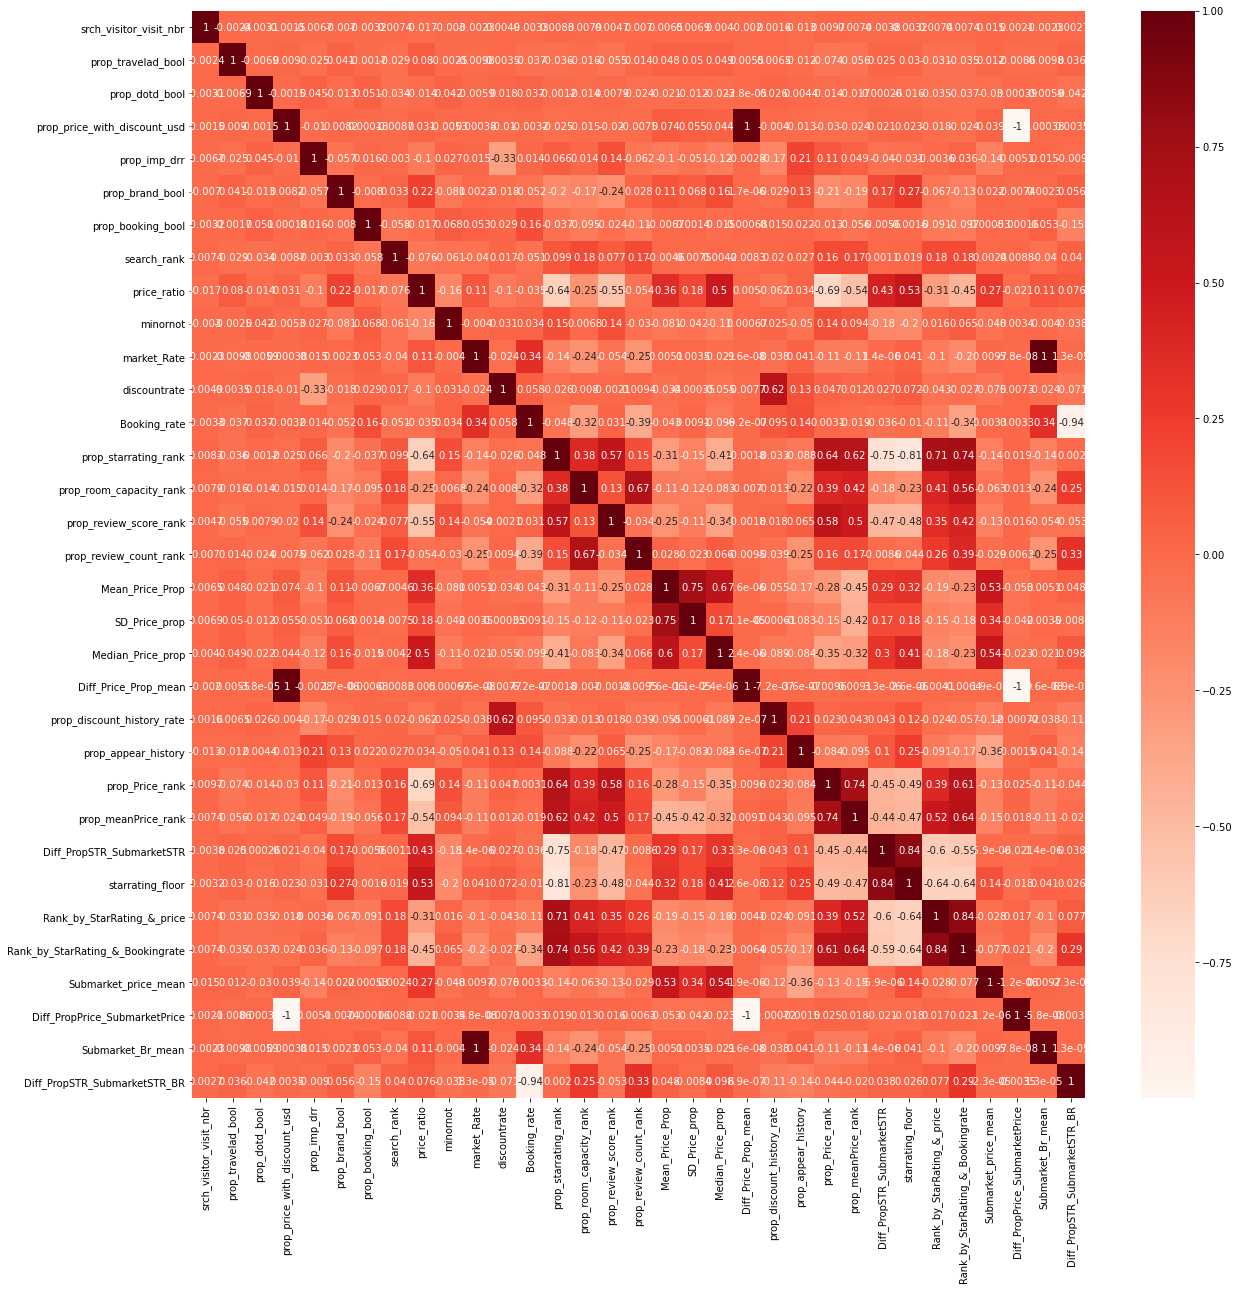

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
mydata.describe
plt.figure(figsize=(20,20))
cor=mydata.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

In [17]:
from sklearn.utils import shuffle
# Randomly choosing 20% of the data for testing

mydata=shuffle(mydata)

np.random.seed(1001)
chosen_idx = np.random.choice(mydata.shape[0], replace=False, size=int(mydata.shape[0]*0.2))

# Choosing train and test data set
mydata_test= mydata[mydata.index.isin(chosen_idx)]
mydata_train= mydata[~mydata.index.isin(chosen_idx)]


# Creating Xtest and Ytest
X_test = mydata_test.iloc[:, mydata.columns != 'prop_booking_bool']
y_test = mydata_test.prop_booking_bool

# we need it for the test dataset
Final_col_name = X_test.columns

In [18]:
from sklearn.utils import shuffle

mydata_train=shuffle(mydata_train)
class_count_0, class_count_1 =mydata_train['prop_booking_bool'].value_counts()

class_0=mydata_train[mydata_train['prop_booking_bool']==0]
class_1=mydata_train[mydata_train['prop_booking_bool']==1]
class_0_under=class_0.sample(class_count_1*4)
mydata_US=pd.concat([class_0_under,class_1])

# Creating Xtrain and Ytrain
X_train_US = mydata_US.iloc[:, mydata.columns != 'prop_booking_bool']
y_train_US = mydata_US.prop_booking_bool


print("Number of datasets before Under Sampling : ",mydata.shape[0] )
print("Ratio of booked labeles before Under Sampling : ",mydata.prop_booking_bool.mean()*100, "%")

print("Number of datasets after Under Sampling : ",mydata_US.shape[0])
print("Ratio of booked labeles after Under Sampling : ",mydata_US.prop_booking_bool.mean()*100, "%")

Number of datasets before Under Sampling :  840990
Ratio of booked labeles before Under Sampling :  2.8547307340158623 %
Number of datasets after Under Sampling :  96570
Ratio of booked labeles after Under Sampling :  20.0 %


In [19]:
from sklearn.model_selection import train_test_split
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import collections
from sklearn.metrics import ndcg_score
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


def classification_metrics(Y_pred, Y_true):
    #TODO: Calculate the above mentioned metrics
    #NOTE: It is important to provide the output in the same order
    acc = accuracy_score(Y_true, Y_pred)
    fpr, tpr, thresholds = roc_curve(Y_true, Y_pred)
    auc_ = auc(fpr, tpr)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    F1score = f1_score(Y_true, Y_pred)
    
    return acc,auc_,precision,recall,F1score

#input: Name of classifier, predicted labels, actual labels
def display_metrics(classifierName,Y_pred,Y_true):
    print("______________________________________________")
    print(("Classifier: "+classifierName))
    acc, auc_, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print(("Accuracy: "+str(acc)))
    print(("AUC: "+str(auc_)))
    print(("Precision: "+str(precision)))
    print(("Recall: "+str(recall)))
    print(("F1-score: "+str(f1score)))
    print("______________________________________________")
    print("")

In [22]:
xgb = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic' )

param_grid ={"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

                            
xgb_rscv = RandomizedSearchCV(xgb, param_distributions = param_grid, scoring = 'f1',cv = 5, verbose = 2, random_state = 40)

# Fit the model

                            
model_xgboost_SMOT = xgb_rscv.fit(X_train_US, y_train_US)  
                                      

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, total=  14.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, total=  14.6s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, total=  14.1s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, total=  14.1s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estim

[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, total=  45.6s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, total=  46.9s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, total=  44.9s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 89.3min finished


xgb = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic', subsample= 0.7,
 reg_lambda= 3,
 reg_alpha= 0,
 n_estimators= 250,
 min_child_weight= 7,
 max_depth=10,
 learning_rate= 0.01,
 gamma= 0.3,
 colsample_bytree= 1.0 )
model_xgboost_SMOT = xgb.fit(X_train_US, y_train_US)

In [23]:
y_pred_SMOT = model_xgboost_SMOT.predict(X_test)
#y_pred_US = model_xgboost_US.predict(X_test)


display_metrics('model xgboost with SMOT',y_pred_SMOT,y_test)

______________________________________________
Classifier: model xgboost with SMOT
Accuracy: 0.9398791756353387
AUC: 0.6400719129514681
Precision: 0.1792776791000592
Recall: 0.32253941201533876
F1-score: 0.23045893903645634
______________________________________________



In [24]:
model_xgboost_SMOT.best_params_

{'subsample': 0.4,
 'reg_lambda': 1.5,
 'reg_alpha': 0,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0.3,
 'colsample_bytree': 0.6}

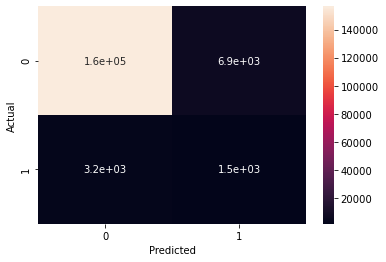

In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':   y_test,
        'y_Predicted': y_pred_SMOT
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [26]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,15)
sorted_idx = model_xgboost_SMOT.feature_importances_.argsort()
plt.barh(X_train_US.columns[sorted_idx], model_xgboost_SMOT.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [41]:
raw_data= pd.read_csv('Data/test.csv')
raw_data_train= pd.read_csv('Data/train.csv')

In [42]:
test_data=raw_data.loc[:,search_level+property_level]
test_train_data=raw_data_train.loc[:,search_level+property_level]

In [43]:
test_train_data.isnull().sum(axis = 0)

srch_id                             0
srch_visitor_visit_nbr              0
prop_key                            0
prop_travelad_bool                  0
prop_dotd_bool                      0
prop_price_without_discount_usd    51
prop_price_with_discount_usd       51
prop_imp_drr                        0
prop_brand_bool                     0
prop_starrating                     0
prop_market_id                      0
prop_submarket_id                   0
prop_room_capacity                  0
prop_review_score                   8
prop_review_count                   8
dtype: int64

In [44]:
na_features = ['prop_price_with_discount_usd','prop_price_without_discount_usd','prop_review_score','prop_review_count']
test_data[na_features] = test_data[na_features].fillna(value=test_data[na_features].mean(), inplace=False)
test_train_data[na_features] = test_train_data[na_features].fillna(value=test_train_data[na_features].mean(), inplace=False)

In [47]:
test_data['datatype']="test"
test_train_data['datatype']='train'

Alldata= pd.concat([test_data,test_train_data])

,srch_id,srch_visitor_visit_nbr,prop_key,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,datatype
0,-1087756044,3,3075608,0,0,535.0,199.0,0,0,4.0,95656,96809,90,4.3,344.0,test
1,-1087756044,3,242706,0,0,549.0,219.0,0,1,4.0,95656,96810,596,4.0,2494.0,test
2,-1087756044,3,247231,0,0,635.0,245.0,0,1,4.0,95656,96812,426,4.4,1129.0,test
3,-1087756044,3,258704,0,0,402.0,209.0,0,0,4.0,95656,96812,-9998,3.6,4629.0,test
4,-1087756044,3,3407116,0,0,609.0,269.0,0,1,4.0,95656,96812,597,4.7,953.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,5,249748,0,0,334.0,284.0,1,1,4.0,95656,85868,251,4.1,1928.0,train
841111,964783409,5,255778,0,0,649.0,269.0,0,1,4.0,95656,96809,712,4.2,605.0,train
841112,964783409,5,244678,0,0,285.0,225.0,0,0,3.0,95656,96809,369,4.0,5305.0,train
841113,964783409,5,259221,0,0,559.0,314.0,0,1,4.0,95656,96812,770,4.2,1809.0,train


In [36]:
def feature_extraction_test(Data, Market_rate, Booking_rate):
     
    # Extracting Serach rank
    Data['search_rank'] = Data.groupby(['srch_id']).cumcount()+1
    
    #Extracting Price Ratio
    Data['max_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(max)
    Data['price_ratio']=Data.prop_price_with_discount_usd/Data.max_price
    Data.drop("max_price",axis=1,inplace=True)
    
    #Extracting minimum price or not
    Data['min_price'] = Data.groupby(['srch_id'])['prop_price_with_discount_usd'].transform(min)
    Data.loc[Data['prop_price_with_discount_usd'] == Data['min_price'] , 'minornot'] = 1
    Data.loc[Data['prop_price_with_discount_usd'] != Data['min_price'] , 'minornot'] = 0
    Data.drop("min_price",axis=1,inplace=True)

    # Extracting Market Rate
    Data = pd.merge(Data,Market_rate, on=['prop_market_id', 'prop_submarket_id'])
    #Data.drop('prop_market_id',axis=1,inplace=True)
    #Data.drop('prop_submarket_id',axis=1,inplace=True)
    
    
    # Extracting discount rate for the property
    Data['discountrate'] = (Data.prop_price_without_discount_usd-Data.prop_price_with_discount_usd)/Data.prop_price_without_discount_usd
    Data.drop('prop_price_without_discount_usd',axis=1,inplace=True)
    
    # Extracting booking rate of the property
    Data = pd.merge(Data,Booking_rate, on=['prop_key'])

    
    # Extracting property star rating rank
    Data["prop_starrating_rank"] = Data.groupby("srch_id")["prop_starrating"].rank("dense", ascending=False)
    #Data.drop('prop_starrating',axis=1,inplace=True)

    # Extracting room capacity rank
    Data["prop_room_capacity_rank"] = Data.groupby("srch_id")["prop_room_capacity"].rank("dense", ascending=False)
    Data.drop('prop_room_capacity',axis=1,inplace=True)
    
    # Extracting prop review score rank
    Data["prop_review_score_rank"] = Data.groupby("srch_id")["prop_review_score"].rank("dense", ascending=False)
    Data.drop('prop_review_score',axis=1,inplace=True)
    
    # Extracting prop review count rank
    Data["prop_review_count_rank"] = Data.groupby("srch_id")["prop_review_count"].rank("dense", ascending=False)
    Data.drop('prop_review_count',axis=1,inplace=True)
    
    
    
    
    

    #new features for Prperty Key
    Data['Mean_Price_Prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('mean')
    Data['SD_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('std')
    Data['Median_Price_prop'] = Data.groupby(['prop_key'], as_index= False)['prop_price_with_discount_usd'].transform('median')
    Data['Diff_Price_Prop_mean'] = Data['prop_price_with_discount_usd']-Data['Mean_Price_Prop']
    Data["prop_discount_history_rate"] = Data.groupby(['prop_key'], as_index= False)['discountrate'].transform('mean')
    Data["prop_appear_history"] = Data.groupby(['prop_key'], as_index= False)['srch_id'].transform('count')


    Data["prop_Price_rank"] = Data.groupby("srch_id")["prop_price_with_discount_usd"].rank("dense", ascending=False)
    Data["prop_meanPrice_rank"] = Data.groupby("srch_id")["Mean_Price_Prop"].rank("dense", ascending=False)

    Data['Submarket_Starrating_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['prop_starrating'].transform('mean')
    Data['Diff_PropSTR_SubmarketSTR']=Data['prop_starrating']- Data['Submarket_Starrating_mean']
    
    Data['starrating_floor']=Data['prop_starrating'].apply(np.floor)
    
    Data['Rank_by_StarRating_&_price']=Data.sort_values(by=['starrating_floor', 'price_ratio'], ascending=[False, True]).groupby(['srch_id'], as_index= False, sort=False).cumcount()+1
    Data['Rank_by_StarRating_&_Bookingrate']=Data.sort_values(by=['starrating_floor', 'Booking_rate'], ascending=[False, False]).groupby(['srch_id'], as_index= False, sort=False).cumcount()+1

    
    Data['Submarket_price_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['prop_price_with_discount_usd'].transform('mean')
    Data['Diff_PropPrice_SubmarketPrice']=Data['Submarket_price_mean']-Data['prop_price_with_discount_usd']
    
    Data['Submarket_Br_mean']= Data.groupby(['prop_submarket_id'], as_index= False)['Booking_rate'].transform('mean')
    Data['Diff_PropSTR_SubmarketSTR_BR']=Data['Submarket_Br_mean']-Data['Booking_rate']
    
    
    
    #Data['Submarket_price_mean_B1']= Data.groupby(['prop_submarket_id'], as_index= False)[Data.prop_booking_bool==1]['prop_price_with_discount_usd'].mean('mean')
   # Data['Diff_PropPrice_SubmarketPrice_B1']=Data['Submarket_price_mean_B1']-Data['prop_price_with_discount_usd']
    
    #Data['Submarket_Br_mean_B1']= Data.groupby(['prop_submarket_id'], as_index= False)[Data.prop_booking_bool==1]['Booking_rate'].transform('mean')
    #Data['Diff_PropSTR_SubmarketSTR_BR_B1']=Data['Submarket_Br_mean_B1']-Data['Booking_rate']
    

    
    #Data['Mean_lat']= Data.groupby("srch_id", as_index= False)['srch_dest_latitude'].transform('mean')
    #Data['Mean_long']= Data.groupby("srch_id", as_index= False)['srch_dest_longitude'].transform('mean')
    
    #Data = Data.assign(mean_distance=lambda x: haversine_distance(x['srch_dest_latitude'], x['srch_dest_longitude'], x['Mean_lat'], x['Mean_long'])) 
    
    #Data['mean_distance'] = Data[['srch_dest_latitude','srch_dest_longitude','Mean_lat','Mean_long']].apply(lambda x = )
    
    
    
    #Data.drop('srch_dest_latitude',axis=1,inplace=True)
    #Data.drop('srch_dest_longitude',axis=1,inplace=True)
    #Data.drop('Mean_long',axis=1,inplace=True)
    #Data.drop('Mean_lat',axis=1,inplace=True)
    
    Data.drop('Submarket_Starrating_mean',axis=1,inplace=True)
    Data.drop('prop_starrating',axis=1,inplace=True)
    Data.drop('prop_market_id',axis=1,inplace=True)
    Data.drop('prop_submarket_id',axis=1,inplace=True)
    
    #Data.drop('srch_id',axis=1,inplace=True)
    #Data.drop('prop_key',axis=1,inplace=True)   

    
    return Data

In [48]:
mytestdata = feature_extraction_test(Alldata.copy(), Market_rate, Booking_rate)
mytestdata=mytestdata[mytestdata.datatype=="test"]
# selecting same coumns as trainig dataset
columns = list(Final_col_name) + ['srch_id','prop_key']

mytestdata = mytestdata[columns]
mytestdata

,srch_visitor_visit_nbr,prop_travelad_bool,prop_dotd_bool,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,search_rank,price_ratio,minornot,market_Rate,discountrate,Booking_rate,prop_starrating_rank,prop_room_capacity_rank,prop_review_score_rank,prop_review_count_rank,Mean_Price_Prop,SD_Price_prop,Median_Price_prop,Diff_Price_Prop_mean,prop_discount_history_rate,prop_appear_history,prop_Price_rank,prop_meanPrice_rank,Diff_PropSTR_SubmarketSTR,starrating_floor,Rank_by_StarRating_&_price,Rank_by_StarRating_&_Bookingrate,Submarket_price_mean,Diff_PropPrice_SubmarketPrice,Submarket_Br_mean,Diff_PropSTR_SubmarketSTR_BR,srch_id,prop_key
0,3,0,0,199.00,0,0,1,0.204103,0.0,0.033202,0.628037,0.064343,3.0,48.0,5.0,47.0,292.916524,159.136947,265.00,-93.916524,0.284834,561,21.0,42.0,0.115916,4.0,5,5,388.148623,189.148623,0.033309,-0.031035,-1087756044,3075608
1,5,0,0,311.00,1,0,13,0.289302,0.0,0.033202,0.198454,0.064343,3.0,48.0,6.0,47.0,292.916524,159.136947,265.00,18.083476,0.284834,561,31.0,47.0,0.115916,4.0,8,3,388.148623,77.148623,0.033309,-0.031035,-2082689725,3075608
2,11,0,0,395.25,1,0,41,0.687391,0.0,0.033202,0.150000,0.064343,3.0,45.0,5.0,43.0,292.916524,159.136947,265.00,102.333476,0.284834,561,6.0,40.0,0.115916,4.0,31,5,388.148623,-7.101377,0.033309,-0.031035,-488718586,3075608
3,25,0,0,379.00,1,0,42,0.602544,0.0,0.033202,0.050125,0.064343,3.0,43.0,4.0,47.0,292.916524,159.136947,265.00,86.083476,0.284834,561,14.0,38.0,0.115916,4.0,19,3,388.148623,9.148623,0.033309,-0.031035,961100126,3075608
4,2,0,0,269.00,0,0,27,0.275897,0.0,0.033202,0.518784,0.064343,3.0,48.0,3.0,51.0,292.916524,159.136947,265.00,-23.916524,0.284834,561,8.0,42.0,0.115916,4.0,27,5,388.148623,119.148623,0.033309,-0.031035,969295275,3075608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192048,1,0,0,102.14,1,0,37,0.228409,0.0,0.043478,0.350296,0.000000,4.0,28.0,15.0,31.0,92.443333,17.203756,102.14,9.696667,0.350074,3,27.0,32.0,0.267857,3.0,29,34,112.715000,10.575000,0.035714,0.035714,1767650487,3234962
1192051,6,0,0,102.93,0,0,39,0.219593,0.0,0.043478,0.000000,0.000000,6.0,31.0,14.0,34.0,121.270000,15.883816,130.27,-18.340000,0.000000,3,29.0,31.0,-0.732143,2.0,45,46,112.715000,9.785000,0.035714,0.035714,-932795151,2747578
1192071,1,0,0,71.35,0,0,43,0.159555,0.0,0.000000,0.093162,0.000000,5.0,32.0,19.0,35.0,70.776667,0.916206,71.26,0.573333,0.102730,3,38.0,39.0,0.000000,3.0,21,35,85.502000,14.152000,0.000000,0.000000,1767650487,3918072
1192072,6,0,0,71.26,0,0,36,0.152028,0.0,0.000000,0.100025,0.000000,5.0,36.0,19.0,40.0,70.776667,0.916206,71.26,0.483333,0.102730,3,41.0,42.0,0.000000,3.0,24,34,85.502000,14.242000,0.000000,0.000000,-932795151,3918072


In [52]:
mytestdata.to_csv('Data/mytest.csv')

In [49]:
# predicting the booking probability 
test_result_SMOT = np.array(model_xgboost_SMOT.predict_proba(mytestdata[Final_col_name]))
#test_result_US = np.array(model_xgboost_US.predict_proba(mytestdata[Final_col_name]))

# creating the ranking dataframe
SMOT_Ranking=pd.DataFrame({'srch_id':mytestdata['srch_id'],'prop_key':mytestdata['prop_key'], 'prop_booking_bool':test_result_SMOT[:,1]})
#UST_Ranking=pd.DataFrame({'srch_id':mytestdata['srch_id'],'prop_key':mytestdata['prop_key'], 'prop_booking_bool':test_result_US[:,1]})

SMOT_Ranking

,srch_id,prop_key,prop_booking_bool
0,-1087756044,3075608,0.295795
1,-2082689725,3075608,0.324184
2,-488718586,3075608,0.041129
3,961100126,3075608,0.076752
4,969295275,3075608,0.097135
...,...,...,...
1192048,1767650487,3234962,0.002018
1192051,-932795151,2747578,0.002065
1192071,1767650487,3918072,0.002123
1192072,-932795151,3918072,0.002015


In [50]:
SMOT_Ranking= SMOT_Ranking.sort_values(["srch_id"], ascending=True) \
    .groupby(["srch_id"], sort=False) \
    .apply(lambda x: x.sort_values(['prop_booking_bool'], ascending=False)) \
    .reset_index(drop=True)
SMOT_Ranking

,srch_id,prop_key,prop_booking_bool
0,-2147403968,358698,0.358874
1,-2147403968,3392809,0.317472
2,-2147403968,289794,0.315331
3,-2147403968,364047,0.306767
4,-2147403968,265073,0.301416
...,...,...,...
351140,2146902698,254367,0.031097
351141,2146902698,495424,0.019367
351142,2146902698,292812,0.015389
351143,2146902698,257087,0.012442


In [51]:
SMOT_Ranking.iloc[:,0:2].to_csv('pred_booking_bool.csv', index=False)